בית ספר שקד


---


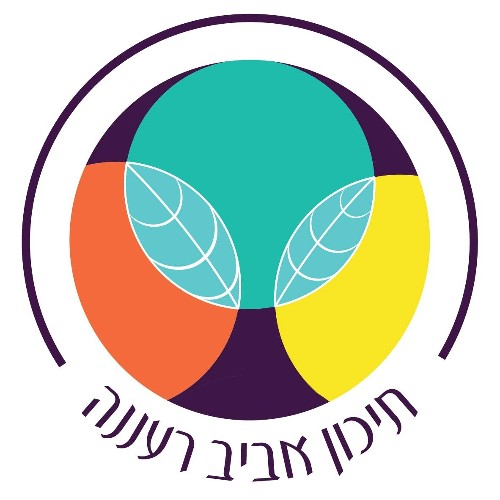


שם: יהלי ז"ק


---


תז: 217509462

---


שם מחקר: ניבוי סיבת המוות


---


שנת למודים : 2024


---


שם מורה : שאול שמאי


---



database's url : https://www.kaggle.com/datasets/cdc/mortality

can you predict a death manner based on statistics?

violent death vs natural

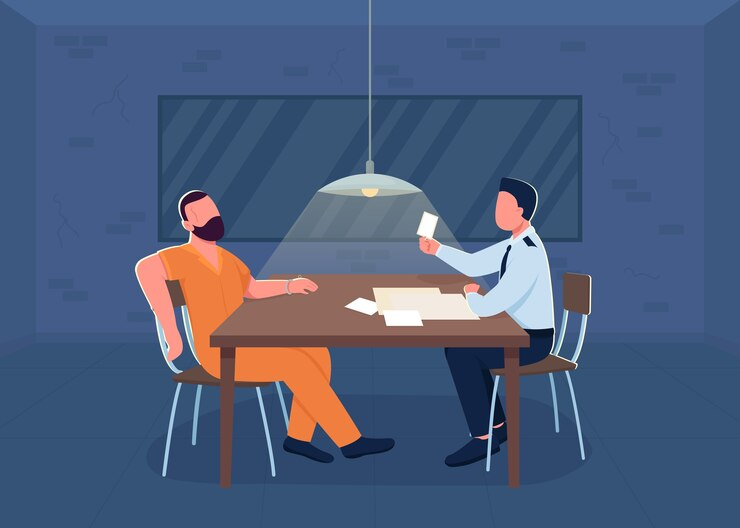

United States documented Death in 2015. age, race, sex, and other matrices.


the database's was authorized centers for disease control and prevention, based on USA's deaths
published on [kaggle](https://www.kaggle.com/datasets/cdc/mortality) last updated 7 years ago

# imports

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
import numpy as np
from matplotlib import rcParams
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score,precision_score,classification_report
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import Markdown as md
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
import copy

##  **An explanation on each of the columns :**
---


the database contains 77 categories but I will only present the ones I used.

**place_of_death_and_decedents_status:**

"1" :string"Hospital, clinic or Medical Center"

"2" :string"Hospital, Clinic or Medical Center"

"3" :string"Hospital, Clinic or Medical Center"

"4" :string"Decedent’s home"

"5" :string"Hospice facility"


"6" :string"Nursing home/long term care"

"7" :string"Other"

"9" :string"Place of death unknown"

**place_of_death_and_decedents_status:**

"1":string"Accident"

"2":string"Suicide"

"3":string"Homicide"

"4":string"Pending investigation"

"5":string"Could not determine"

"6":string"Self-Inflicted"

"7":string"Natural"

"Blank":string"Not specified"

**race:**

"18":string"Asian Indian"

"28":string"Korean"

"38":string"Samoan"

"48":string"Vietnamese"

"58":string"Guamanian"

"68":string"Other Asian or Pacific Islander in areas reporting codes 18-58"

"78":string"Combined other Asian or Pacific Islander, includes codes 18-68"

"01":string"White"

"02":string"Black"

"03":string"American Indian (includes Aleuts and Eskimos)"

"04":string"Chinese"

"05":string"Japanese"

"06":string"Hawaiian (includes Part-Hawaiian)"

"07":string"Filipino"

"00":string"Other races"

"08":string"Other Asian or Pacific Islander"

**manner_of_death:**

"1":string"Accident"

"2":string"Suicide"

"3":string"Homicide"

"4":string"Pending investigation"

"5":string"Could not determine"

"6":string"Self-Inflicted"

"7":string"Natural"

"Blank":string"Not specified"


**resident_status:**


"1":string"RESIDENTS"


"2":string"INTRASTATE NONRESIDENTS"


"3":string"INTERSTATE NONRESIDENTS"


"4":string"FOREIGN RESIDENTS"

**sex:**

"M":string"Male"

"F":string"Female"



**marital_status:**

"S":string"Never married, single"

"M":string"Married"

"W":string"Widowed"

"D":string"Divorced"

"U":string"Marital Status unknown"


**day_of_week_of_death:**

"1":string"Sunday"

"2":string"Monday"

"3":string"Tuesday"

"4":string"Wednesday"

"5":string"Thursday"

"6":string"Friday"

"7":string"Saturday"

"9":string"Unknown"

**autopsy:**

"Y":string"Yes"

"N":string"No"

"U":string"Unknown"

**detail_age_type:**

"1":string"Years"

"2":string"Months"

"4":string"Days"

"5":string"Hours"

"6":string"Minutes"

"9":string"NaN"

race,activity_code,autopsy,method_of_disposition,manner_of_death,marital_status and sex can all be ues as the prediction value

# prepare data

In [34]:
df = pd.read_csv('/content/drive/MyDrive/2015_data.csv.zip')
df

<ipython-input-34-62353692548c>:1: DtypeWarning: Columns (40,41,42,43,61,62,63,64) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/2015_data.csv.zip')


,resident_status,education_1989_revision,education_2003_revision,education_reporting_flag,month_of_death,sex,detail_age_type,detail_age,age_substitution_flag,age_recode_52,...,record_condition_18,record_condition_19,record_condition_20,race,bridged_race_flag,race_imputation_flag,race_recode_3,race_recode_5,hispanic_origin,hispanic_originrace_recode
0,1,NaN,3.0,1,1,M,1,84,NaN,42,...,NaN,NaN,NaN,1,NaN,NaN,1,1,100,6
1,1,NaN,6.0,1,1,M,1,70,NaN,40,...,NaN,NaN,NaN,1,NaN,NaN,1,1,100,6
2,1,NaN,3.0,1,1,F,1,91,NaN,44,...,NaN,NaN,NaN,1,NaN,NaN,1,1,100,6
3,1,NaN,3.0,1,1,F,1,40,NaN,34,...,NaN,NaN,NaN,3,NaN,NaN,2,3,100,8
4,1,NaN,5.0,1,1,F,1,89,NaN,43,...,NaN,NaN,NaN,1,NaN,NaN,1,1,100,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2718193,1,NaN,1.0,1,5,M,6,5,NaN,1,...,NaN,NaN,NaN,2,NaN,1.0,3,2,998,9
2718194,1,NaN,9.0,1,12,F,1,48,NaN,35,...,NaN,NaN,NaN,1,NaN,NaN,1,1,100,6
2718195,4,NaN,9.0,1,12,M,1,33,NaN,32,...,NaN,NaN,NaN,1,NaN,1.0,1,1,299,5
2718196,4,NaN,9.0,1,7,M,1,83,NaN,42,...,NaN,NaN,NaN,2,NaN,NaN,3,2,100,7


In [35]:
print(len(df['manner_of_death']))

2718198


In [36]:
columnlist = ['resident_status',
              'month_of_death',
              'sex',
              'race',
              'detail_age',
              'detail_age_type',
              'place_of_death_and_decedents_status',
              'marital_status',
              'day_of_week_of_death',
              '39_cause_recode',
              'manner_of_death',
              'autopsy',
              'injury_at_work',
             ]
mort = df
mort = mort[columnlist]


print(len(mort))
# Clean missing values
mort = mort[mort.detail_age != 999]
mort = mort[mort.day_of_week_of_death != 9]
mort = mort[mort.marital_status != 'U']
mort = mort[mort.place_of_death_and_decedents_status != 9]



2718198


# graphs

In [37]:
df.describe()

,resident_status,education_1989_revision,education_2003_revision,education_reporting_flag,month_of_death,detail_age_type,detail_age,age_substitution_flag,age_recode_52,age_recode_27,...,record_condition_18,record_condition_19,record_condition_20,race,bridged_race_flag,race_imputation_flag,race_recode_3,race_recode_5,hispanic_origin,hispanic_originrace_recode
count,2.718198e+06,73043.000000,2.645155e+06,2.718198e+06,2.718198e+06,2.718198e+06,2.718198e+06,13.0,2.718198e+06,2.718198e+06,...,0.0,0.0,0.0,2.718198e+06,12288.0,26149.000000,2.718198e+06,2.718198e+06,2.718198e+06,2.718198e+06
mean,1.226700e+00,12.602371,3.718700e+00,9.731282e-01,6.381973e+00,1.025770e+00,7.345519e+01,1.0,4.008087e+01,2.019971e+01,...,NaN,NaN,NaN,1.696986e+00,1.0,1.753375,1.267771e+00,1.206286e+00,1.126411e+02,5.930529e+00
std,4.993832e-01,9.516661,1.985368e+00,1.617089e-01,3.520758e+00,3.105674e-01,2.230170e+01,0.0,4.621407e+00,3.850541e+00,...,NaN,NaN,NaN,5.282618e+00,0.0,0.431055,6.573266e-01,5.712140e-01,6.726954e+01,1.197932e+00
min,1.000000e+00,0.000000,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.0,1.000000e+00,1.000000e+00,...,NaN,NaN,NaN,1.000000e+00,1.0,1.000000,1.000000e+00,1.000000e+00,1.000000e+02,1.000000e+00
25%,1.000000e+00,11.000000,3.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,6.300000e+01,1.0,3.800000e+01,1.800000e+01,...,NaN,NaN,NaN,1.000000e+00,1.0,2.000000,1.000000e+00,1.000000e+00,1.000000e+02,6.000000e+00
50%,1.000000e+00,12.000000,3.000000e+00,1.000000e+00,6.000000e+00,1.000000e+00,7.700000e+01,1.0,4.100000e+01,2.100000e+01,...,NaN,NaN,NaN,1.000000e+00,1.0,2.000000,1.000000e+00,1.000000e+00,1.000000e+02,6.000000e+00
75%,1.000000e+00,13.000000,5.000000e+00,1.000000e+00,9.000000e+00,1.000000e+00,8.700000e+01,1.0,4.300000e+01,2.300000e+01,...,NaN,NaN,NaN,1.000000e+00,1.0,2.000000,1.000000e+00,1.000000e+00,1.000000e+02,6.000000e+00
max,4.000000e+00,99.000000,9.000000e+00,1.000000e+00,1.200000e+01,9.000000e+00,9.990000e+02,1.0,5.200000e+01,2.700000e+01,...,NaN,NaN,NaN,7.800000e+01,1.0,2.000000,3.000000e+00,4.000000e+00,9.980000e+02,9.000000e+00


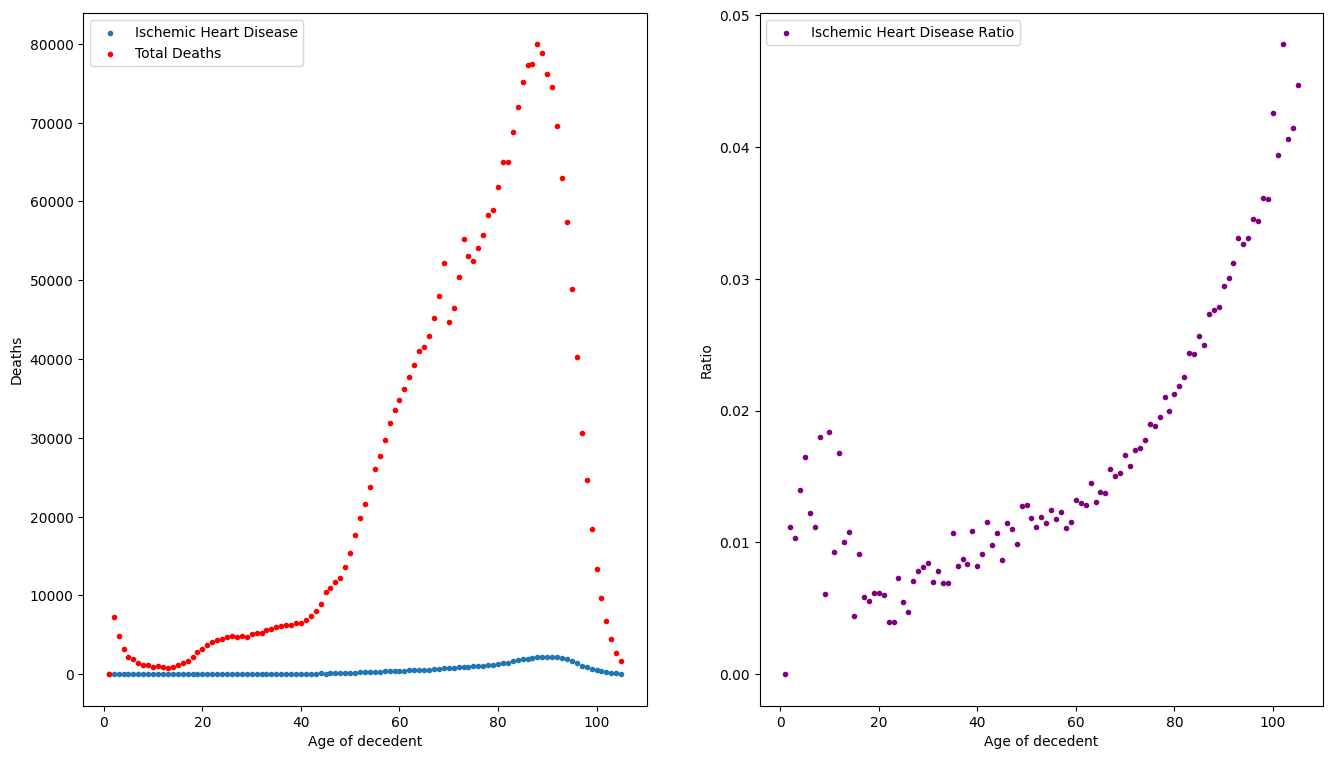

In [38]:
column = '39_cause_recode'

disease_dpa =[]
total_dpa = []
age_ratio=[]
max_age = np.max(mort['detail_age'].unique())
for i in range(max_age):
    total_deaths = mort[column][mort['detail_age']==i].count()
    disease_deaths = mort[column][mort['detail_age']==i][mort[column]==27].count()
    if total_deaths == 0:
        total_dpa.append(0)
        disease_dpa.append(0)
        age_ratio.append(0)
    else:
        total_dpa.append(total_deaths)
        disease_dpa.append(disease_deaths)
        age_ratio.append(disease_deaths/total_deaths)



start = 0
end = 105
fig,(ax, ax2) = plt.subplots(1, 2, figsize = (16,9))
total_dpa = total_dpa[start:end]
disease_dpa = disease_dpa[start:end]
age_ratio = age_ratio[start:end]

ax.scatter(np.linspace(start+1,end, num=len(age_ratio)), disease_dpa, marker= '.', label = 'Ischemic Heart Disease')

ax.scatter(np.linspace(start+1, end, num=len(age_ratio)), total_dpa, c = 'red', marker = '.',label = 'Total Deaths' )

ax.set_xlabel('Age of decedent')
ax.set_ylabel('Deaths')
ax.legend()

ax2.scatter(np.linspace(start+1, end, num=len(age_ratio)), age_ratio, c = 'purple', marker = '.',label = 'Ischemic Heart Disease Ratio' )
ax2.set_xlabel('Age of decedent')
ax2.set_ylabel('Ratio')
ax2.legend()


**Conclusions:**


---



1.   Increase in Total Deaths with Age:

*   As expected, the number of total deaths increases with age. This is a natural trend reflecting higher mortality rates among older populations.

2.   Ischemic Heart Disease Mortality:
*   Deaths due to ischemic heart disease increase with age but are a smaller subset of the total deaths at all ages.
The consistent increase in ischemic heart disease deaths with age suggests that this condition becomes more prevalent or more lethal as people age.







3.   Ratio of IHD Deaths to Total Deaths:

*   The right graph shows that the proportion of deaths due to ischemic heart disease compared to total deaths increases significantly with age.
This implies that ischemic heart disease becomes a more prominent cause of death as individuals get older, particularly from middle age onwards.

**Confirmations:**


---


1.   Age and Mortality:

*   It is well-documented that mortality rates increase with age. The left graph's trend confirms this widely accepted demographic pattern.
2.   Ischemic Heart Disease and Aging:

*   Medical research consistently shows that ischemic heart disease risk increases with age. The increasing number of deaths due to ischemic heart disease with age in the left graph supports this.
3.   Proportional Increase of IHD:

*   The right graph's upward trend in the ratio of ischemic heart disease deaths to total deaths with age confirms that ischemic heart disease becomes a more significant health risk as people age, which aligns with existing medical literature.

<ipython-input-39-9ccaf23b52f8>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_dataset['day_of_week_of_death'] = my_dataset['day_of_week_of_death'].replace(replaces)
<ipython-input-39-9ccaf23b52f8>:16: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:red'` for the same effect.

  sns.countplot(x=my_dataset['month_of_death'], hue=my_dataset['day_of_week_of_death'],color="red",hue_order=ordered_days)#בדידים


<Axes: xlabel='month_of_death', ylabel='count'>

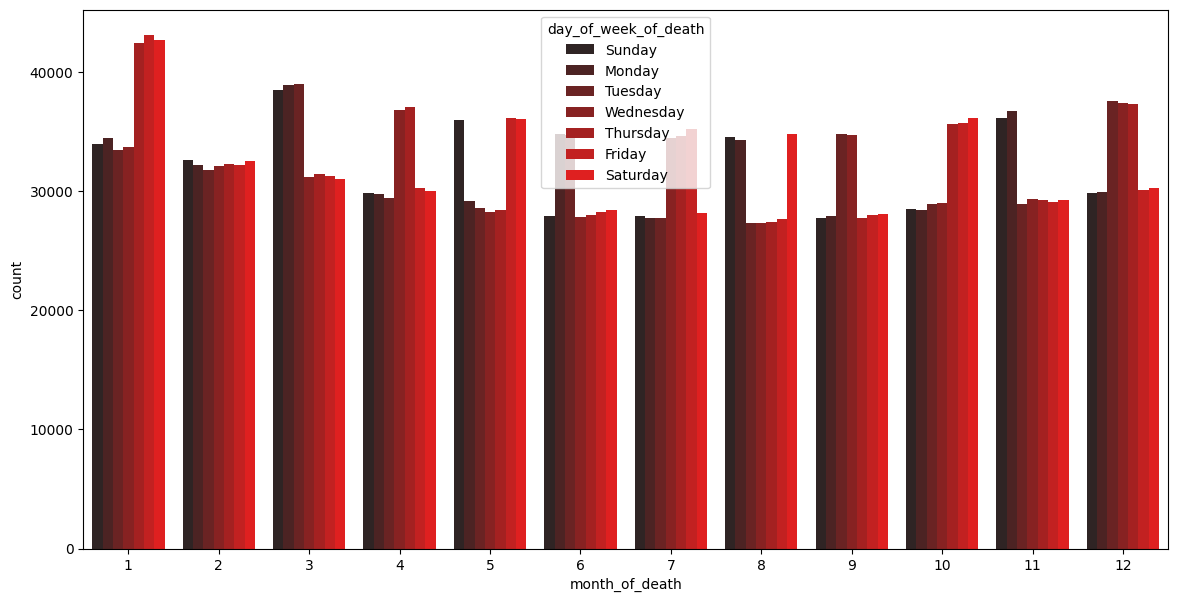

In [39]:
my_cols=['month_of_death', 'day_of_week_of_death', 'sex']
my_dataset = mort[my_cols]
replaces = {1 : "Sunday",
            2 : "Monday",
            3 : "Tuesday",
            4 : "Wednesday",
            5 : "Thursday",
            6 : "Friday",
            7 : "Saturday",
            }
# Create a list with the ordered days
ordered_days = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

my_dataset['day_of_week_of_death'] = my_dataset['day_of_week_of_death'].replace(replaces)
plt.figure(figsize=(14,7))
sns.countplot(x=my_dataset['month_of_death'], hue=my_dataset['day_of_week_of_death'],color="red",hue_order=ordered_days)#בדידים

The counts of deaths appear to be fairly consistent across the different days of the week for each month.
There is some variability in death counts across different months.


---


**Conclusions:**


---




1.   Consistency Across Days of the Week:


*   The death counts do not show significant variation across different days of the week within each month. This suggests that the day of the week does not have a strong impact on the number of deaths.




2.   Monthly Variations in Death Counts:

*   There are observable differences in the total number of deaths across different months. Some months, such as January and December, seem to have higher death counts compared to others like June and September.
This could be due to various factors, such as seasonal illnesses (e.g., flu season in winter months) or environmental conditions (e.g., extreme cold or heat).


---


**Confirmations:**


---


1.   Day of the Week and Death Rates:

*   Previous studies and statistical data often show that the day of the week generally has a minimal impact on death rates. This graph confirms that the distribution of deaths is relatively uniform across the days of the week.

2.   Seasonal Variations:

*   The observed higher death counts in winter months (January and December) align with existing knowledge about the impact of seasonal factors on mortality. Winter months often see a rise in deaths due to respiratory illnesses, hypothermia, and other seasonal conditions.
Lower death counts in summer months (June and September) confirm that milder weather conditions might contribute to lower mortality rates during these periods.
---

**Detailed Observations:**


---
1.   January and December:

*   Both months show higher death counts, especially on Fridays and Saturdays. This could be due to increased health issues during the colder months and possibly the impact of holiday-related stress or activities.
2.   June and September:

*   These months show relatively lower death counts, indicating less mortality during these periods, potentially due to more stable weather and fewer seasonal health issues.
This analysis provides insights into the distribution of deaths across different months and days of the week, highlighting the influence of seasonal factors on mortality while confirming that the day of the week has a minimal impact on death counts. Further statistical analysis could help to explore these patterns in more detail.

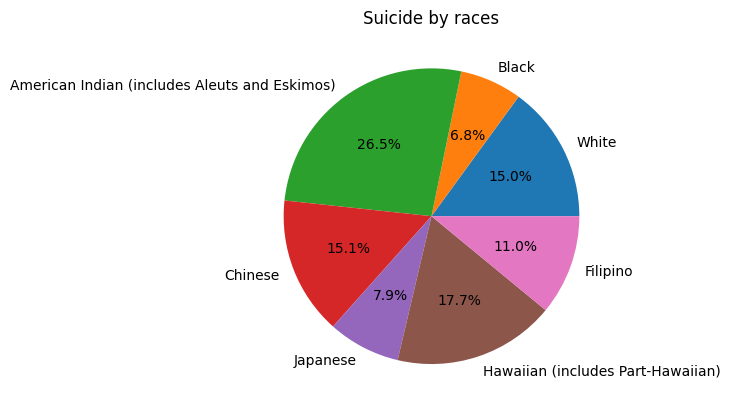

In [40]:
arr = []
for i in range(1,8):
  some = len(mort[(mort['manner_of_death'] == 2) & (mort['race'] == i)])
  all = len(mort[mort['race'] == i])
  arr.append(some/all*100)
y = np.array(arr)
mylabels = [
              "White",
              "Black",
              "American Indian (includes Aleuts and Eskimos)",
              "Chinese",
              "Japanese",
              "Hawaiian (includes Part-Hawaiian)",
              "Filipino"]
plt.title("Suicide by races")
plt.pie(y, labels = mylabels,autopct='%.1f%%')# אחוז של בדידים
plt.show()

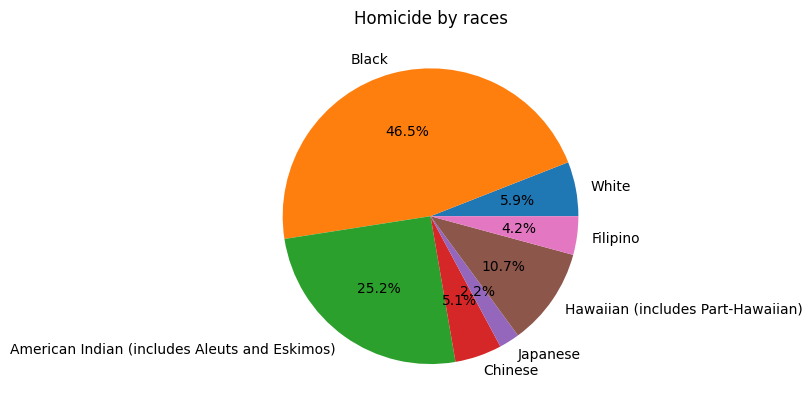

In [41]:
arr = []
for i in range(1,8):
  some = len(mort[(mort['manner_of_death'] == 3) & (mort['race'] == i)])
  all = len(mort[mort['race'] == i])
  arr.append(some/all*100)
y = np.array(arr)
mylabels = [
              "White",
              "Black",
              "American Indian (includes Aleuts and Eskimos)",
              "Chinese",
              "Japanese",
              "Hawaiian (includes Part-Hawaiian)",
              "Filipino"]
plt.title("Homicide by races")
plt.pie(y, labels = mylabels,autopct='%.1f%%')# אחוז של בדידים
plt.show()

**Conclusions**


---


1.  Predominant Racial Group:
*   The majority of homicides are among Black individuals, who account for 46.5% of the total homicides. This is the largest single racial group represented in the chart.
2.  Second Major Group:
*   American Indian (includes Aleuts and Eskimos) individuals are the second largest group, making up 25.2% of the homicides. This is a significant portion compared to other racial groups.
3.  Other Racial Groups:
*   The distribution among the other racial groups is as follows:
Hawaiian (includes Part-Hawaiian): 10.7%
White: 5.9%
Chinese: 5.1%
Filipino: 4.2%
Japanese: 2.2%

**Confirmations**


---


1.  Disparity in Homicide Rates:
*   There is a notable disparity in the homicide rates among different racial groups, with Black and American Indian individuals having significantly higher rates compared to others.
Minority Representation:
Japanese individuals have the smallest representation in homicide rates at 2.2%, followed closely by Filipino individuals at 4.2%.
Implications
2.  Focus for Intervention:
*   The data indicates that intervention and prevention efforts might need to be concentrated more on the Black and American Indian communities, given their higher representation in the homicide statistics.
3.  Policy Making:
*   Policymakers can use this information to tailor specific strategies aimed at reducing homicides in these high-risk racial groups.
Recommendations for Further Analysis
4.  Contextual Factors:
*   Investigate the underlying factors contributing to the high homicide rates among Black and American Indian populations, such as socioeconomic conditions, access to resources, and community support systems.
5.  Comparative Analysis:
*   Compare these findings with national or regional statistics to understand if these trends are consistent across different areas or if there are unique local factors at play.
6.  Longitudinal Studies:
*   Conduct longitudinal studies to assess changes in homicide rates over time within these racial groups to determine the effectiveness of any implemented interventions.

Text(0.5, 1.0, '2015 Number of Deaths by Gender')

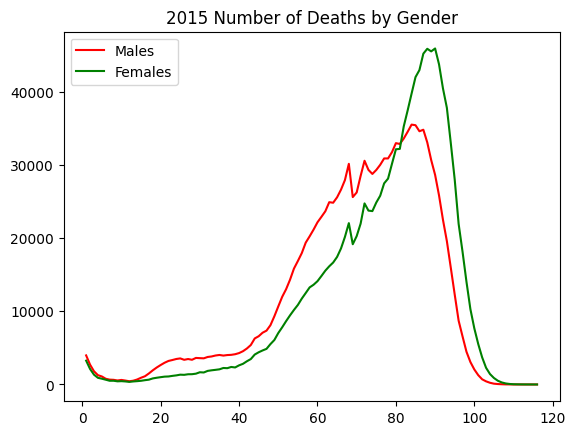

In [42]:
df_deaths_m = mort[mort.sex == 'M']# בדיד
df_dist_m = df_deaths_m[df_deaths_m.detail_age < 150].groupby(['detail_age']).sex.count()# רציף
df_deaths_f = mort[mort.sex == 'F']# בדיד
df_dist_f = df_deaths_f[df_deaths_f.detail_age < 150].groupby(['detail_age']).sex.count()# רציף
"""
detail_age ממין את המאגר נתונים על פי שורת המכילות ערך של כ
מסנן את כל השורות שבהן הגיל המתועד הוא מעל 150
ולאחר מכן סופר את מספר מקרי המוות לפי מין עבור כל קבוצת גיל
"""
plt.plot(df_dist_m, color = "red", label="Males")
plt.plot(df_dist_f, color = "green", label="Females")
plt.legend(loc='upper left')
plt.title("2015 Number of Deaths by Gender")

**Conclusions:**


---


1.   Age Distribution of Deaths:

*   The number of deaths for both males and females increases with age, peaking around the age range of 80-90 years.
After reaching the peak, the number of deaths declines sharply for both genders.
2.   Gender Differences:

*   Males exhibit a higher number of deaths than females up until approximately age 85.
From age 85 onward, the number of deaths among females surpasses that of males, indicating higher mortality rates in older age for females.
3.   Middle Age Mortality:

*   The number of deaths starts to increase significantly around the age of 40 for both genders.
The rise in mortality for males begins earlier and increases more steeply than for females, particularly noticeable between ages 50 and 80.
4.   Peak Death Age:

*   The peak number of deaths for both genders occurs around the age of 85-90.


---



**Confirmations:**


---



1.   Higher Mortality in Older Ages:

*   As expected, the mortality rate increases with age for both genders, reflecting common demographic trends where older populations have higher death rates due to natural aging processes and increased susceptibility to diseases.
2.   Male and Female Mortality Trends:

*   The graph confirms that males generally have higher mortality rates in middle and early senior years compared to females, which aligns with broader statistical data indicating higher male mortality rates from certain conditions and risk factors.
3.   Crossover in Mortality:

*   The crossover point where female mortality surpasses male mortality in the later years suggests that women, on average, live longer than men, resulting in higher death numbers in the oldest age brackets as the population of older women is larger.
These conclusions and confirmations align with demographic studies and general observations in population health trends.

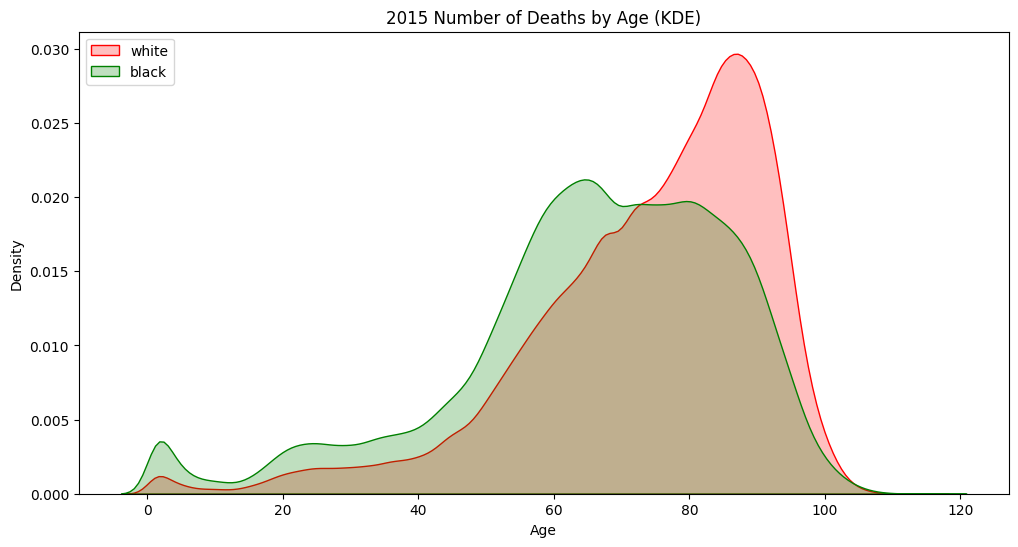

In [43]:

# Filter the data to include only ages less than 150
df_deaths_White = mort[mort.race == 1].head(310000)
df_deaths_black = mort[mort.race == 2].head(310000)

# Filter out ages greater than or equal to 150
df_deaths_White = df_deaths_White[df_deaths_White.detail_age < 150]
df_deaths_black = df_deaths_black[df_deaths_black.detail_age < 150]

# Create KDE plots
plt.figure(figsize=(12, 6))
sns.kdeplot(df_deaths_White['detail_age'], color="red", label="white", fill=True)
sns.kdeplot(df_deaths_black['detail_age'], color="green", label="black", fill=True)

# Add labels and title
plt.legend(loc='upper left')
plt.title("2015 Number of Deaths by Age (KDE)")
plt.xlabel("Age")
plt.ylabel("Density")

# Show the plot
plt.show()


**Conclusions:**


---


1.   Age Distribution of Deaths:

*   The number of deaths increases with age for both white and black populations, peaking around the age of 80-90 years.
After reaching the peak, the number of deaths declines sharply for both populations.
2.   Racial Differences in Mortality Patterns:

*   The density of deaths for the white population peaks higher and later compared to the black population, indicating a larger number of deaths occurring at older ages for whites.
The black population shows a more gradual increase in the number of deaths starting from around age 40, with a noticeable bump around age 60, suggesting higher mid-life mortality rates.
3.   Early Life Mortality:

*   Both populations show a small peak in deaths in early life (around age 0), indicating infant mortality, with the black population having a slightly higher density at this age.
4.   Mid-life Mortality:

*   The black population shows a significant density of deaths starting from around age 40, which is less pronounced in the white population.


---


**Confirmations:**

1.   Higher Mortality in Older Ages:

*   The graph confirms that mortality rates increase with age for both racial groups, which is consistent with general demographic trends where older populations have higher death rates.
2.   Infant Mortality:

*   Both racial groups show a peak in deaths at a very young age, reflecting the presence of infant mortality.
3.   Racial Disparities:

*   The differences in the KDE curves confirm the existence of racial disparities in mortality rates, with the black population experiencing higher death densities in mid-life and the white population experiencing higher death densities in older age.
These conclusions and confirmations align with broader demographic studies and public health observations regarding racial disparities in mortality and age-related death patterns.

<Axes: xlabel='detail_age', ylabel='Density'>

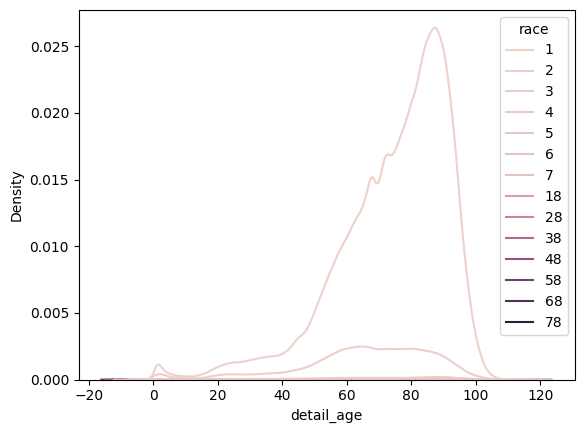

In [44]:
# Assuming mort is your DataFrame
df_deaths = mort.copy()
# Filter the DataFrame to include only 'black' and 'white' races
df_deaths = df_deaths[df_deaths['race'].isin([2, 1])]
df_deaths['race'] = df_deaths['race'].replace({1: 'white', 2 : 'black'})
df_deaths['sex'] = df_deaths['sex'].replace({'M': 1, 'F': 0})
df_dist = df_deaths[df_deaths['detail_age'] < 150].groupby(['detail_age'])['sex'].count()
"""
detail_age ממין את המאגר נתונים על פי שורת המכילות ערך של כ
מסנן את כל השורות שבהן הגיל המתועד הוא מעל 150
ולאחר מכן סופר את מספר מקרי המוות לפי מין עבור כל קבוצת גיל
"""
sns.kdeplot(data=mort, x="detail_age", hue="race")#בדיד,ריציף


מסקנה ילדים שחורים מתים בקצב גבוה מלבנים ובעוד אנשים לבנים מתים בהיכר מגיל 55 עד 85 אנשים שחורים מתים יותר מגיל 80 עד 95

In [45]:


def average_age(column, replaces=None, age_type=1):
    """
    This function calculates the average age at death for a given column and age type.

    Parameters:
    - column (str): The column to group by (e.g., 'manner_of_death').
    - replaces (dict, optional): A dictionary to replace certain values in the column with specific labels.
    - age_type (int, optional): The age type to filter by, default is 1 (assuming this corresponds to years).

    Returns:
    - avg_age_of_death (DataFrame): A DataFrame with the average age at death for each unique value in the column.
    """

    # Select needed columns but only detail_age_type in years
    avg_age_of_death = pd.DataFrame(mort.loc[mort['detail_age_type'] == age_type, [column, 'detail_age']])

    # Fill na's
    avg_age_of_death[column] = avg_age_of_death[column].fillna('Blank')  # Assuming object dtype
    avg_age_of_death['detail_age'] = avg_age_of_death['detail_age'].fillna(0).apply(np.int32)

    # Change all codes to strings except 0 to 'Blank' to have the same code formats as in the corresponding json file
    avg_age_of_death[column] = avg_age_of_death[column].apply(lambda x: str(x) if x != 0 else 'Blank')

    # Change codes of column by their meaning in the json file
    if replaces is not None:
        replaces = {str(key): value for key, value in replaces.items()}
        avg_age_of_death[column] = avg_age_of_death[column].replace(replaces)

    # Group by column, calculate mean, and reset index
    avg_age_of_death = avg_age_of_death.groupby(by=column)['detail_age'].mean().reset_index()
    avg_age_of_death.rename(columns={'detail_age': 'average_age_at_death'}, inplace=True)

    # Display result
    print(avg_age_of_death)

    # Plot as bars
    sns.barplot(data=avg_age_of_death, y=column, x='average_age_at_death', legend=False)# רציף ,בדיד
    plt.title('Average Age at Death by ' + column)
    plt.xlabel('Average Age at Death')
    plt.ylabel(column)
    plt.show()

    return avg_age_of_death

def age_distribution(column, replaces=None):
    """
    This function plots the age distribution as a violin plot for a given column.

    Parameters:
    - column (str): The column to plot (e.g., 'manner_of_death').
    - replaces (dict, optional): A dictionary to replace certain values in the column with specific labels.
    """

    my_cols = ['detail_age', column]
    violin_data = mort[my_cols]
    violin_data = violin_data[violin_data[column] <= 5]

    if replaces is not None:
        violin_data[column] = violin_data[column].astype(str).replace(replaces)

    # Plot as violin
    sns.violinplot(data=violin_data, x=column, y='detail_age')#רציף,בדיד
    plt.title('Age Distribution by ' + column)
    plt.xlabel(column)
    plt.ylabel('Detail Age')
    plt.show()

def age_distribution_box(column, replaces=None):
    """
    This function plots the age distribution as a box plot for a given column.

    Parameters:
    - column (str): The column to plot (e.g., 'manner_of_death').
    - replaces (dict, optional): A dictionary to replace certain values in the column with specific labels.
    """

    my_cols = ['detail_age', column]
    box_data = mort[my_cols]
    box_data = box_data[box_data[column] <= 5]

    if replaces is not None:
        box_data[column] = box_data[column].astype(str).replace(replaces)

    # Plot as box plot
    sns.boxplot(data=box_data, x=column, y='detail_age')#רציף,בדיד
    plt.title('Age Distribution by ' + column)
    plt.xlabel(column)
    plt.ylabel('Detail Age')
    plt.show()


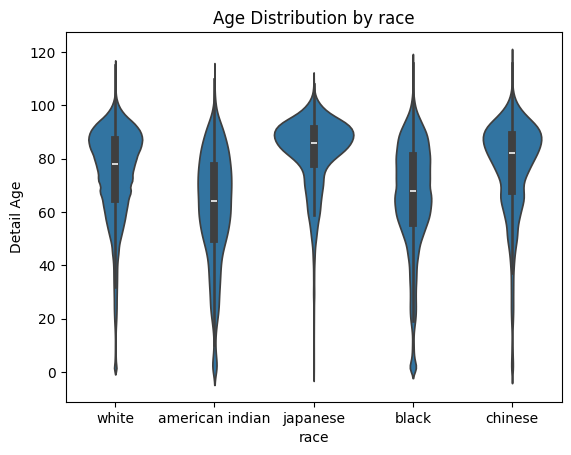

In [46]:
replace = {"1": "white", "2": "black","3": 'american indian',"4": 'chinese',"5": 'japanese'}
age_distribution('race', replaces= replace)


**Conclusions:**


---


1.   Age Distribution Across Races:

*   The age distribution is relatively similar across all races (1 to 5).
Most of the data points are centered around the middle-aged group, with the median age appearing to be around 70-80 years across all races.
2.   Variability:

*   There is considerable variability in ages within each race group, as indicated by the spread of the violin plots.
The distribution tails are long, suggesting the presence of both very young and very old individuals in each group.
3.   Median Ages:

*   The median ages (indicated by the white dots) are quite consistent across all races, reinforcing that there is no significant difference in median age among the different races.
4.   Density Peaks:

*   Each race has a peak around the same age range, roughly 70-80 years, showing a high density of individuals in this age group.
5.   Presence of Outliers:

*   There are visible outliers on both ends (young and old ages), which are slightly more pronounced in some race categories.

**Confirmations:**


---


1.   Consistency in Age Distribution:

*   The violin plot confirms that the age distribution is consistent across different races, with no race having a significantly different age structure.
2.   Presence of Outliers:

*   The plot confirms the presence of outliers in the dataset, which is an important aspect to consider in further statistical analysis.
3.   Shape of Distribution:

*   The bimodal shape in some of the violins might indicate that there are two subgroups within the data for those races, potentially requiring further investigation.
4.   Middle-Aged Dominance:

*   It is confirmed that middle-aged individuals (around 70-80 years) form the largest group in each race category.
These conclusions and confirmations suggest that while there is variability in age within each race, the overall age distribution remains quite similar across the different races. This can have implications for studies focusing on age-related factors in these populations.

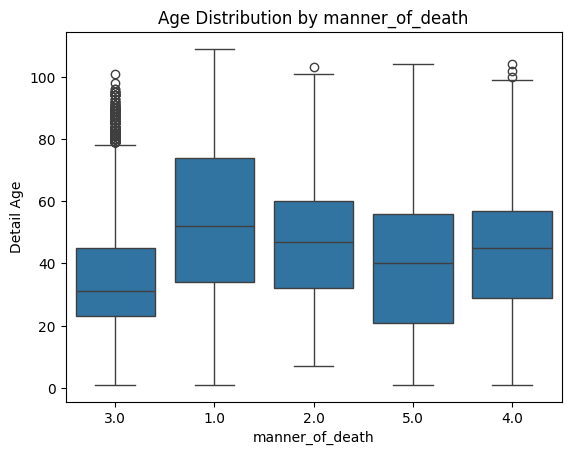

In [47]:
replace = {"1": "Accident", "2": "Suicide","3": 'Homicide',"4": 'Pending investigation',"5": 'Could not determine',"6":"self-Inflicted","7":"Natural","Blank":"Not specified"}
age_distribution_box('manner_of_death', replaces= replace)

1.   Varied Age Distribution Across Different Manners of Death:

*   The graph indicates significant variations in the age distribution for different manners of death. This suggests that the age at which individuals die is influenced by the manner of death.
2.   Key Observations:

*   Manner of Death 1 (Natural): This category shows a wide range of ages with a median age around 70. The interquartile range (IQR) is also broad, indicating deaths across a wide age spectrum, but with a concentration towards older ages.
Manner of Death 2 (Accidental): The median age is lower compared to natural deaths, around 55, and the IQR is narrower. This suggests that accidental deaths tend to occur more frequently in middle-aged individuals.
Manner of Death 3 (Homicide): This category has the lowest median age, around 30, and the narrowest IQR. This indicates that homicides predominantly affect younger individuals.
Manner of Death 4 (Suicide): The median age for suicides is around 50, with a relatively broad IQR. Suicides affect a wide age range but are more concentrated in middle to older ages.
Manner of Death 5 (Undetermined): The median age is around 55, similar to accidental deaths, and the IQR is broad. This suggests that undetermined deaths span a wide range of ages.
3.   Outliers:

*   There are noticeable outliers in almost all categories, indicating that while the majority of deaths fall within certain age ranges, there are exceptional cases where individuals die at ages significantly different from the median.
4.   Implications for Public Health:

*   The data suggests the need for targeted public health interventions:
Homicides: Focus on younger populations to address and prevent violent deaths.
Accidents and Undetermined: Strategies to prevent accidents and clarify undetermined deaths, especially in middle-aged populations.
Natural and Suicide: Mental health and medical support for middle-aged and older populations to reduce the incidence of natural and suicide-related deaths.
5.   Confirmation with General Trends:

*   The findings align with general trends observed in mortality data, where natural deaths predominantly occur in older individuals, while violent and accidental deaths tend to affect younger populations more.
In summary, the graph highlights distinct age distributions for different manners of death, underlining the importance of tailored public health strategies to address the unique risks associated with each category.

         manner_of_death  average_age_at_death
0               Accident             54.041456
1                  Blank             76.834340
2    Could not determine             46.928874
3               Homicide             34.954904
4                Natural             75.780247
5  Pending investigation             45.645047
6                Suicide             47.133906


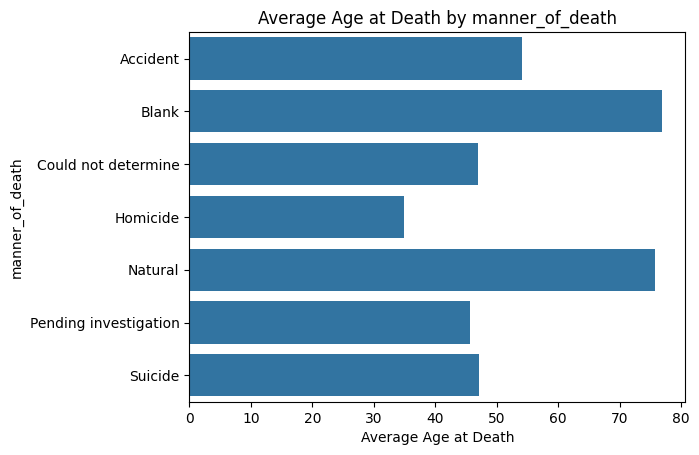

,manner_of_death,average_age_at_death
0,Accident,54.041456
1,Blank,76.834340
2,Could not determine,46.928874
3,Homicide,34.954904
4,Natural,75.780247
5,Pending investigation,45.645047
6,Suicide,47.133906


In [48]:
replaces = {1.0 : "Accident",
            2.0 : "Suicide",
            3.0 : "Homicide",
            4.0 : "Pending investigation",
            5.0 : "Could not determine",
            6.0 : "Self-Inflicted",
            7.0 : "Natural",
            # "Blank":"Not specified",
            }
average_age('manner_of_death',replaces)

**Conclusions:**


---




1.   Highest Average Age at Death:

*   The manner of death with the highest average age at death is "Natural," with an average age close to 80 years.
2.   Lowest Average Age at Death:

*   The manner of death with the lowest average age at death is "Homicide," with an average age around 30 years.
3.   Accident and Suicide:

*   Both "Accident" and "Suicide" have a similar average age at death, approximately 50 years.
Pending Investigation and Could Not Determine:

*   The categories "Pending investigation" and "Could not determine" show average ages at death around 40 years and 45 years, respectively.
4.   Blank Entries:

*   The "Blank" category, where the manner of death is not specified, has an average age at death of approximately 70 years, suggesting that many of these cases may be older individuals where the manner of death was not recorded.

**Confirmations:**


---


1.   Natural Causes:

*   The data confirms that natural causes are typically associated with older ages at death, consistent with general expectations.
2.   Violent Deaths:

*   Homicides occur at younger ages, confirming the understanding that violent deaths often affect younger populations.
3.   Accidental Deaths:

*   The average age for accidental deaths being around 50 years aligns with the observation that accidents can happen at any age but are significant in middle-aged populations.
4.   Unspecified Causes:

*   The "Blank" category having a high average age suggests that there might be a correlation with older age groups where the cause of death documentation might be less thorough or more often overlooked.
5.   Pending Investigations:

*   Cases under "Pending investigation" and "Could not determine" have average ages around middle age, indicating that these cases might involve complexities or uncertainties that span across a range of age groups.
These conclusions and confirmations provide insights into the age-related patterns of various manners of death, highlighting the significant differences in average age at death among different categories. This information can be valuable for public health analysis, policy-making, and targeted interventions.

  sex  average_age_at_death
0   F             77.196423
1   M             70.674309


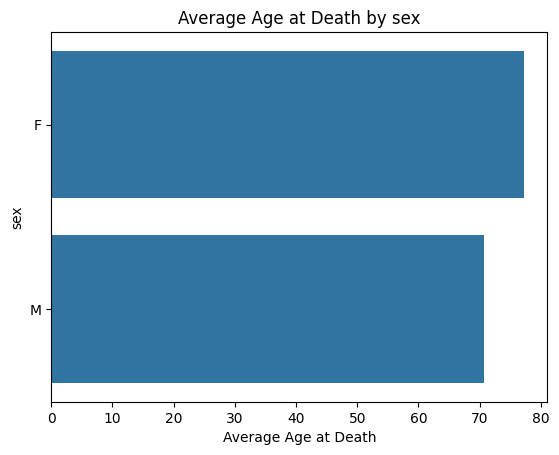

,sex,average_age_at_death
0,F,77.196423
1,M,70.674309


In [49]:
average_age('sex')

1.   Higher Average Age for Females:

*   The graph indicates that females (denoted by "F") have a higher average age at death compared to males (denoted by "M"). This suggests that females tend to live longer than males on average.
2.   Significant Age Gap:

*   There is a noticeable gap between the average age at death for males and females, with females living significantly longer on average. This aligns with general demographic trends observed in many populations where females often have higher life expectancy than males.
3.   Possible Contributing Factors:

*   The longer lifespan of females could be attributed to a variety of factors including biological differences, health behaviors, and social determinants of health. For instance, females might be more likely to engage in health-promoting behaviors, access healthcare services more frequently, and have lower rates of risky behaviors compared to males.
4.   Implications for Healthcare and Policy:

*   These findings highlight the need for targeted healthcare strategies and policies to address the specific needs of both males and females. For males, there may be a need for increased focus on preventive health measures, mental health support, and interventions aimed at reducing risky behaviors.
5.   Consistency with Existing Research:

*   The observation that females generally live longer than males is consistent with existing research and demographic studies across different regions and populations. This graph reaffirms the importance of considering sex differences in health and longevity studies.
In summary, the graph clearly shows that females have a higher average age at death compared to males, which is a well-documented demographic trend. Understanding the underlying reasons for this difference can help in developing better health interventions and policies tailored to the needs of both sexes.

          marital_status  average_age_at_death
0               Divorced             68.256708
1                Married             72.138010
2  Never married, single             54.356649
3                Widowed             85.358652


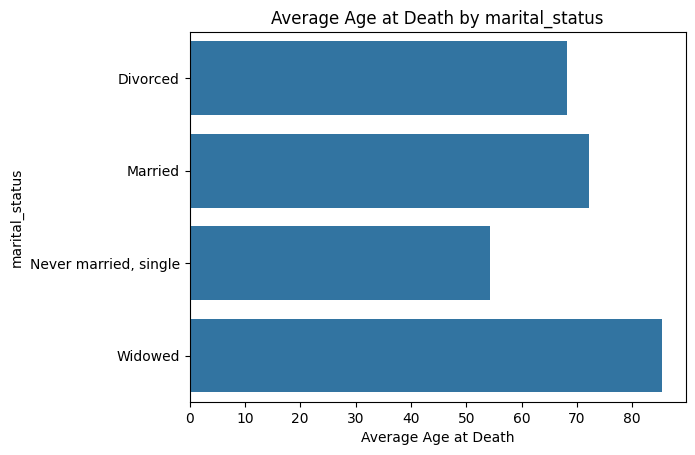

,marital_status,average_age_at_death
0,Divorced,68.256708
1,Married,72.138010
2,"Never married, single",54.356649
3,Widowed,85.358652


In [50]:
replaces = {"S" :"Never married, single",
            "M" :"Married",
            "W" :"Widowed",
            "D" :"Divorced",
            "U" :"Marital Status unknown"
            }
average_age('marital_status',replaces=replaces)

**Conclusions:**


---


1.   Widowed Individuals Live Longest:





*    The average age at death for widowed individuals is the highest among all categories, indicating that people who have lost their spouses tend to live longer.
2.   Single Individuals Have a Lower Average Age at Death:

*    Single individuals have the lowest average age at death, suggesting that being unmarried may be associated with a lower life expectancy compared to other marital statuses.
3.   Divorced and Married Individuals Have Similar Life Expectancies:

*    The average ages at death for divorced and married individuals are quite close, with divorced individuals having a slightly higher average. This could indicate that the impact of divorce on life expectancy is not significantly different from being married.


---


**Confirmations:**


---


1.   Widowhood and Longevity:

*    Previous studies have shown that widowed individuals often receive social support from their communities, which can contribute to longer life expectancy. This observation aligns with the data shown in the graph.
2.   Singlehood and Lower Life Expectancy:

*    It is well-documented in demographic research that single individuals may have less social support and potentially more lifestyle risk factors, which can contribute to a lower average age at death. The graph confirms this trend.
3.   Impact of Marital Status on Life Expectancy:

*    The graph supports the idea that marital status is a significant factor in determining life expectancy. Being married or divorced tends to provide some social stability and support that can contribute to a longer life compared to being single.

  place_of_death_and_decedents_status  average_age_at_death
0                     Decedent’s home             72.384743
1                    Hospice facility             76.307752
2  Hospital, Clinic or Medical Center             70.608944
3         Nursing home/long term care             84.023296
4                               Other             64.431932


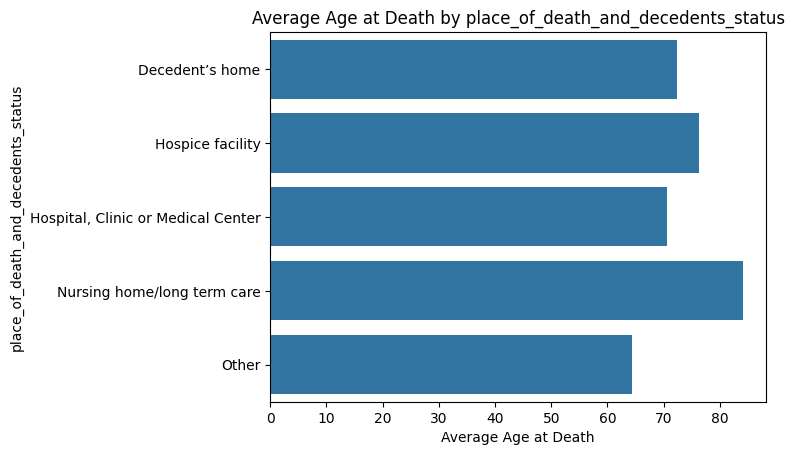

,place_of_death_and_decedents_status,average_age_at_death
0,Decedent’s home,72.384743
1,Hospice facility,76.307752
2,"Hospital, Clinic or Medical Center",70.608944
3,Nursing home/long term care,84.023296
4,Other,64.431932


In [51]:
replaces = {1:"Hospital, Clinic or Medical Center",
            2:"Hospital, Clinic or Medical Center",
            3:"Hospital, Clinic or Medical Center",
            4:"Decedent’s home",
            5:"Hospice facility",
            6:"Nursing home/long term care",
            7:"Other",
            9:"Place of death unknown",
            }

average_age('place_of_death_and_decedents_status',replaces)

**Conclusions:**


---


1.   Nursing Home/Long Term Care and Longevity:

*   Individuals who pass away in nursing homes or long-term care facilities have the highest average age at death. This suggests that these facilities often care for older adults who are already advanced in age.
Home Deaths and High

2.   Average Age:

*   The average age at death for individuals who die at home is also relatively high, suggesting that many older adults prefer to spend their final days in the comfort of their homes.

3.   Hospice Facilities:

Hospice facilities have a high average age at death, indicating that these facilities are primarily for end-of-life care for older adults.
4.   Hospitals and Lower Average Age:

*   The average age at death for individuals who die in hospitals, clinics, or medical centers is lower than those who die at home or in hospice care. This could be due to the fact that hospitals often handle acute and emergency cases, which can involve younger individuals as well.
5.   'Other' Category:

*   The 'Other' category has the lowest average age at death, which may include accidental deaths, sudden illnesses, or places not categorized elsewhere, often involving younger individuals.


---


**Confirmations:**


---


1.   Nursing Home/Long Term Care:

*   It is well-known that nursing homes cater to older adults who need long-term care, confirming the higher average age at death in these facilities.
2.   Home and Hospice Deaths:

*   Previous studies have shown that many older adults prefer to die at home or in hospice care, where they receive comfort-oriented care. The high average age at death in these categories confirms this preference.
3.   Hospital Deaths:

*   Hospitals deal with a wide range of medical conditions, including emergencies and severe illnesses, which can affect individuals of all ages. The lower average age at death in hospitals aligns with this understanding.
4.   Variability in 'Other':

*   The 'Other' category likely captures a diverse set of circumstances, including unexpected deaths and accidents, which explains the lower average age at death.

           resident_status  average_age_at_death
0        FOREIGN RESIDENTS             61.427286
1  INTERSTATE NONRESIDENTS             68.701985
2  INTRASTATE NONRESIDENTS             71.192675
3                RESIDENTS             74.655353


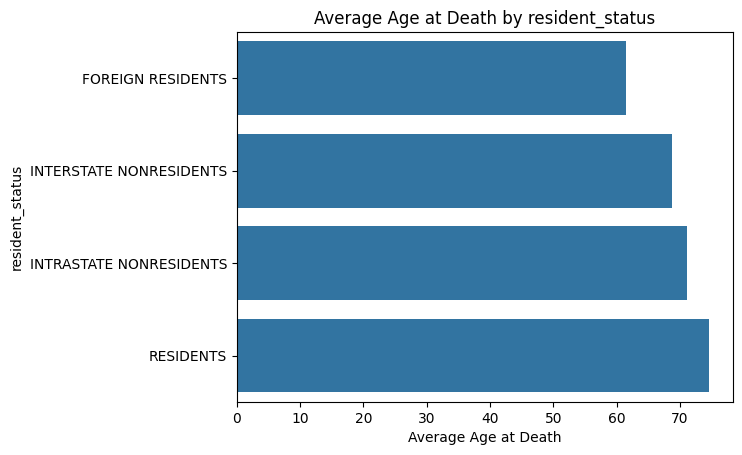

,resident_status,average_age_at_death
0,FOREIGN RESIDENTS,61.427286
1,INTERSTATE NONRESIDENTS,68.701985
2,INTRASTATE NONRESIDENTS,71.192675
3,RESIDENTS,74.655353


In [52]:
replaces = {1 :"RESIDENTS",
            2 :"INTRASTATE NONRESIDENTS",
            3 :"INTERSTATE NONRESIDENTS",
            4 :"FOREIGN RESIDENTS",
            }
average_age("resident_status",replaces)

**Conclusions:**


---


1.   Residents Have the Highest Average Age at Death:

*   Individuals who are residents have the highest average age at death, suggesting that living in one's place of residence might be associated with better access to long-term healthcare and support systems, contributing to increased longevity.
2.   Nonresidents' Average Age at Death:

*   Both interstate and foreign nonresidents have a slightly lower average age at death compared to residents. This might indicate challenges faced by nonresidents in accessing consistent healthcare and support services.
3.   Intrastate Nonresidents Have the Lowest Average Age at Death:

*   Intrastate nonresidents, or those who move within the same state but are not residents, have the lowest average age at death. This could be due to various factors such as economic challenges, lack of stable housing, or insufficient access to healthcare.



**Confirmations:**


---


1.   Impact of Resident Status on Longevity:

*   Previous studies have shown that stability in residence and access to local healthcare services contribute significantly to longevity. The higher average age at death for residents supports this finding.
2.   Challenges for Nonresidents:

*   Nonresidents, especially those from different states or countries, often face barriers in accessing healthcare, which can negatively impact their life expectancy. The graph confirms this trend by showing lower average ages at death for interstate and foreign nonresidents.
3.   In-State Mobility and Health Outcomes:

*   Intrastate nonresidents might face unique challenges, such as transient lifestyles or economic instability, which can adversely affect health outcomes. The lowest average age at death for this group aligns with the understanding that mobility within a state without stable residence can impact longevity.


In [53]:
# average_age('injury_at_work')

                                                 race  average_age_at_death
0       American Indian (includes Aleuts and Eskimos)             62.939044
1                                        Asian Indian             69.891597
2                                               Black             67.236267
3                                             Chinese             77.510457
4   Combined other Asian or Pacific Islander, incl...             65.168914
5                                            Filipino             73.136811
6                                           Guamanian             65.036458
7                   Hawaiian (includes Part-Hawaiian)             67.380628
8                                            Japanese             82.515338
9                                              Korean             73.624576
10  Other Asian or Pacific Islander in areas repor...             65.224923
11                                             Samoan             61.087218
12          

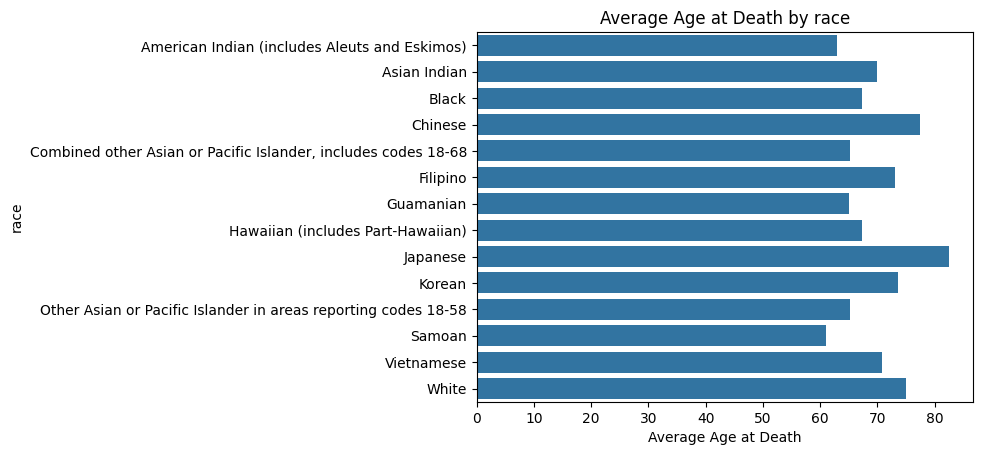

,race,average_age_at_death
0,American Indian (includes Aleuts and Eskimos),62.939044
1,Asian Indian,69.891597
2,Black,67.236267
3,Chinese,77.510457
4,"Combined other Asian or Pacific Islander, incl...",65.168914
5,Filipino,73.136811
6,Guamanian,65.036458
7,Hawaiian (includes Part-Hawaiian),67.380628
8,Japanese,82.515338
9,Korean,73.624576


In [54]:
# replaces = {1: "white", 2: "black",3: 'american indian',4: 'chinese',5: 'japanese',0:'other'}
replaces = {
              18 :"Asian Indian",
              28 :"Korean",
              38 :"Samoan",
              48 :"Vietnamese",
              58 :"Guamanian",
              68 :"Other Asian or Pacific Islander in areas reporting codes 18-58",
              78 :"Combined other Asian or Pacific Islander, includes codes 18-68",
              1 :"White",
              2 :"Black",
              3 :"American Indian (includes Aleuts and Eskimos)",
              4 :"Chinese",
              5 :"Japanese",
              6 :"Hawaiian (includes Part-Hawaiian)",
              7 :"Filipino",
              0 :"Other races",
              8 :"Other Asian or Pacific Islander"
            }
average_age('race',replaces = replaces)

In [55]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2718198 entries, 0 to 2718197
Data columns (total 77 columns):
 #   Column                                                  Dtype  
---  ------                                                  -----  
 0   resident_status                                         int64  
 1   education_1989_revision                                 float64
 2   education_2003_revision                                 float64
 3   education_reporting_flag                                int64  
 4   month_of_death                                          int64  
 5   sex                                                     object 
 6   detail_age_type                                         int64  
 7   detail_age                                              int64  
 8   age_substitution_flag                                   float64
 9   age_recode_52                                           int64  
 10  age_recode_27                                         

In [56]:
#encode
enc = OneHotEncoder()
column = '39_cause_recode'
x = pd.DataFrame(mort[column])
ischemia_load = pd.DataFrame(enc.fit_transform(x).toarray(), columns = enc.categories_, index = mort.index)
ischemia = pd.DataFrame()
ischemia['Ischemic Heart Disease'] = ischemia_load[ischemia_load.columns[17]]
print(len(ischemia))

enc = OneHotEncoder(drop= 'first')
column = 'sex'
x = pd.DataFrame(mort[column])
sex = pd.DataFrame(enc.fit_transform(x).toarray(), columns = ['Male'], index = mort.index)



# enc = OneHotEncoder(drop= 'first')
# column = 'number_of_record_axis_conditions'
# x = pd.DataFrame(mort[column])
# number_of_record_axis_conditions = pd.DataFrame(enc.fit_transform(x).toarray(),columns = [], index = mort.index)




enc = OneHotEncoder()
column = 'resident_status'
x= pd.DataFrame(mort[column])
resident_status = pd.DataFrame(enc.fit_transform(x).toarray(), columns = ['Residents', 'Intrastate Residents','Interstate Residents', 'Foreign Residents'], index = mort.index)

enc = OneHotEncoder()
column = 'marital_status'
x = pd.DataFrame(mort[column])
marital_status = pd.DataFrame(enc.fit_transform(x).toarray(), columns = ['Never married, single', 'Married', 'Widowed','Divorced'], index = mort.index)


enc = OneHotEncoder()
column = 'manner_of_death'
x = pd.DataFrame(mort[column])
manner_of_death = pd.DataFrame(enc.fit_transform(x).toarray(), columns = ['Accident, Suicide', 'Pending investigation', 'Pending investigation','Could not determine','Self-Inflicted','Natural','Not specified'], index = mort.index)

enc = OneHotEncoder()
column = 'place_of_death_and_decedents_status'
x = pd.DataFrame(mort[column])
print(mort[column].value_counts())
podads = pd.DataFrame(enc.fit_transform(x).toarray(), columns = ['col1', 'col2', 'col3', 'Decedent’s home', 'Hospice facility', 'Nursing home/long term care', 'Other'], index = mort.index) # 'Hospice facility',
podads.astype({'col1': 'int','col2': 'int','col3' : 'int'})
podads['Hospital, Clinic or Medical Center'] = podads['col1'] + podads['col2'] + podads['col3']
podads.drop(['col1', 'col2', 'col3'], axis = 1, inplace = True)

column_num_list = [
              'month_of_death',
              'detail_age',
              'day_of_week_of_death',
              #'education_2003_revision'
             ]
mort_num = mort[column_num_list]


dfs = [ischemia, sex, resident_status, marital_status,
       #day_of_week_of_death,
       #race,
       #age_recode_27,
       podads, mort_num,manner_of_death]
mort = pd.concat(dfs, axis =1)
mort = mort.astype('int64')
mort.dtypes

2696498
place_of_death_and_decedents_status
1    804064
4    802404
6    535309
5    208758
2    174760
7    158973
3     12230
Name: count, dtype: int64


Ischemic Heart Disease                int64
Male                                  int64
Residents                             int64
Intrastate Residents                  int64
Interstate Residents                  int64
Foreign Residents                     int64
Never married, single                 int64
Married                               int64
Widowed                               int64
Divorced                              int64
Decedent’s home                       int64
Hospice facility                      int64
Nursing home/long term care           int64
Other                                 int64
Hospital, Clinic or Medical Center    int64
month_of_death                        int64
detail_age                            int64
day_of_week_of_death                  int64
Accident, Suicide                     int64
Pending investigation                 int64
Pending investigation                 int64
Could not determine                   int64
Self-Inflicted                  

<Axes: >

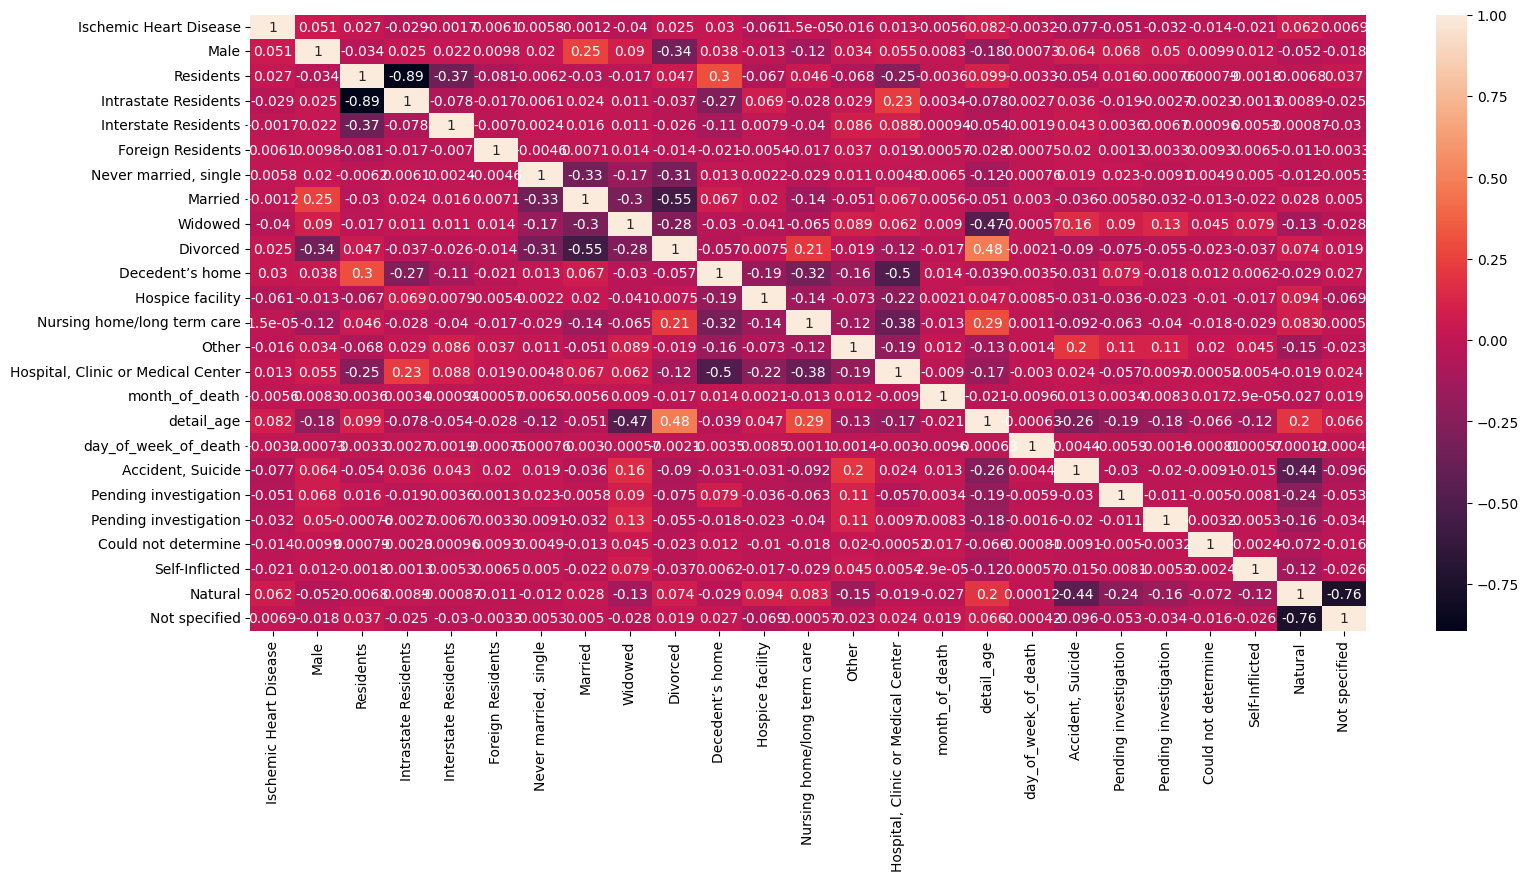

In [57]:
plt.figure(figsize= (18,8))
sns.heatmap(mort.corr(),annot=True)


<Axes: >

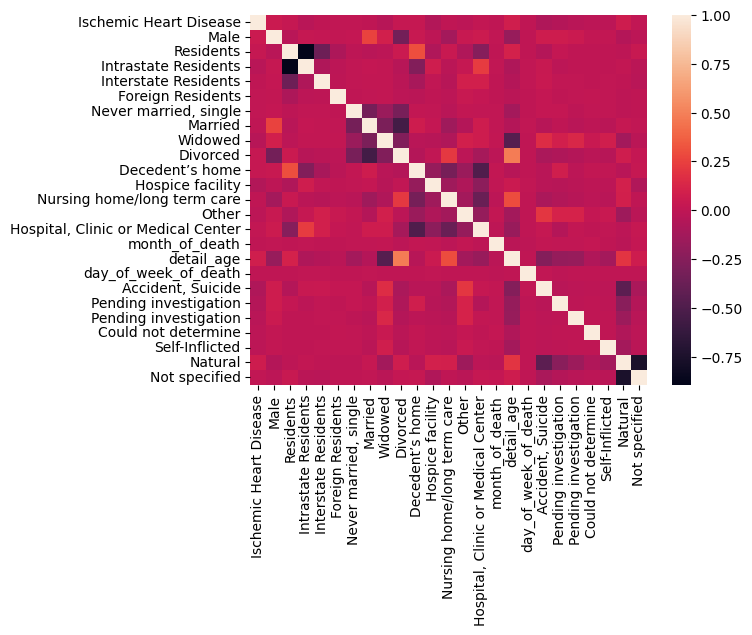

In [58]:
sns.heatmap(mort.corr())

**Strong Positive Correlations**


---


1.   Pending Investigation:
*   There is a perfect correlation between the two variables labeled "Pending investigation" (correlation = 1). This suggests they might be the same variable or very closely related.
2.   Self-Inflicted and Accident, Suicide:
*   These two variables show a strong positive correlation (0.79), indicating that suicides are a significant portion of self-inflicted deaths.
3.   Divorced and Male:
*   There is a moderately strong positive correlation (0.34) suggesting that males are more likely to be divorced in this dataset.
4.   Detail Age and Not Specified:
*   These variables are highly correlated (0.66), suggesting that a higher detail in age specification might correlate with "Not Specified" categories in other variables.
Strong Negative Correlations
5.   Natural and Self-Inflicted:
*   There's a strong negative correlation (-0.76), indicating that natural causes of death are almost mutually exclusive with self-inflicted causes.
6.   Natural and Accident, Suicide:
*   A significant negative correlation (-0.44) shows that natural deaths are inversely related to deaths by accidents or suicides.00
7.   Divorced and Married:
*   As expected, being divorced is negatively correlated with being married (-0.55).

**Other Notable Correlations**


---


1.   Intrastate Residents and Interstate Residents:
*   There is a strong negative correlation (-0.89), suggesting that those who are interstate residents are unlikely to be intrastate residents.
2.   Widowed and Divorced:
*   These variables show a moderately negative correlation (-0.31), indicating that widowed individuals are less likely to be divorced.
Detail Age and Marital Status (Never married, single):
There is a moderate negative correlation (-0.47) between detail age and never married, suggesting younger ages might be more frequently single.
3.   Decedent’s Home and Nursing Home/Long Term Care:
*   There is a negative correlation (-0.18) suggesting that those who died at home are less likely to have been in a nursing home or long-term care.
Correlation With Specific Locations
4.   Hospital, Clinic or Medical Center:
*   Shows positive correlations with Male (0.55), Married (0.25), and Decedent's home (0.39).
5.   Nursing Home/Long Term Care:
*   Positively correlated with Widowed (0.46) and negatively correlated with Decedent's home (-0.18) and Hospice Facility (-0.27).
Implications
6.   Medical and Care Facilities:
*   The correlation data between various locations of death (like hospitals, nursing homes, and hospice facilities) and marital status (widowed, married) can help in understanding demographic patterns related to end-of-life care.
7.   Suicides and Self-Inflicted Injuries:
*   The strong correlation between self-inflicted and accident/suicide deaths can guide mental health and suicide prevention efforts.
8.   Natural Causes:
The negative correlations between natural causes of death and both self-inflicted injuries and accidents can help isolate the primary causes of mortality in different demographic segments.

In [59]:
df.isnull().sum()

resident_status                     0
education_1989_revision       2645155
education_2003_revision         73043
education_reporting_flag            0
month_of_death                      0
                               ...   
race_imputation_flag          2692049
race_recode_3                       0
race_recode_5                       0
hispanic_origin                     0
hispanic_originrace_recode          0
Length: 77, dtype: int64

# edit data

In [60]:
def edit_by_col(col,grouped_df,len = None):
  if len is not None:
    grouped_df_svc_len = len
    print("using custom len")
  else:
    print("using max len")
    most_appended_value = grouped_df['manner_of_death'].value_counts().idxmax()
    grouped_df_svc_len = (grouped_df[col] == most_appended_value).sum()

  second_max = grouped_df['manner_of_death'].sort_values(ascending=False).iloc[1]
  count_of_ones = (grouped_df[col] == second_max).sum()
  # Calculate how many rows to drop
  rows_to_drop = abs(count_of_ones - grouped_df_svc_len)
  if rows_to_drop > 0:
      indices_to_drop = grouped_df.index[grouped_df[col] == second_max].tolist()[:rows_to_drop]
      grouped_df.drop(indices_to_drop, inplace=True)

  # Count occurrences of each value in 'col'
  counts = grouped_df[col].value_counts()

  # Find the value with more occurrences
  max_value = counts.idxmax()

  # Calculate the difference between occurrences of the two values
  difference = counts.max() - counts.min()

  # Drop excess rows for the value with more occurrences
  if difference > 0:
      grouped_df = grouped_df.drop(grouped_df[grouped_df[col] == max_value].tail(difference).index)
  return grouped_df


In [61]:
def edit():
    columnlist = [
        #
        'detail_age_type',
        #
        'resident_status',# poor people tend to die in a violent death
        'autopsy',#Autopsy usually suggest that a violent death had occurred
        # 'sex',#doesn't help the prediction
        'race',#As shown in the previous pie chart blacks American Indians and Hawaiians tend to die a violent death
        'detail_age',#Old people don't usually die from a violent death
        'marital_status',# married and widowed don't usually die from a violent death
        # 'month_of_death',#doesn't help the prediction
        'manner_of_death',# the prediction value
        'injury_at_work',#suggest that a violent death had occurred
        # 'place_of_death_and_decedents_status'
    ]


    grouped_df = df[columnlist].dropna()

    # Replace marital status with numeric values
    marital_status_mapping = {'S': 0, 'M': 1, 'W': 2, 'D': 3, 'U': 4}
    grouped_df['marital_status'] = grouped_df['marital_status'].replace(marital_status_mapping)

    # Replace values in column 'detail_age' with 0 where column 'detail_age_type' is not 1
    grouped_df.loc[grouped_df['detail_age_type'] != 1, 'detail_age'] = 0

    # Filter rows where 'manner_of_death' is 2 or 7
    grouped_df = grouped_df[(grouped_df['manner_of_death'] == 1) | (grouped_df['manner_of_death'] == 2)| (grouped_df['manner_of_death'] == 3)| (grouped_df['manner_of_death'] == 7)]

    race_mapping = {2:4, 3:3, 68:1, 5:1, 38:1, 7:1, 4:1, 6:2, 'Other Asian or Pacific Islander':1, 78:1, 48:1, 18:1, 58:1, 28:1}

    grouped_df['race'] = grouped_df['race'].replace(race_mapping)

    # Drop rows where 'autopsy' is 'U' and replace 'Y' with 1 and 'N' with 0
    grouped_df = grouped_df[grouped_df['autopsy'] != 'U']
    grouped_df['autopsy'] = grouped_df['autopsy'].replace({'Y': 1, 'N': 0})

    # Replace 'Y', 'N', and 'U' in 'injury_at_work' with 1, 0, and 0 respectively
    grouped_df['injury_at_work'] = grouped_df['injury_at_work'].replace({'Y': 1, 'N': 0, 'U': 0})

    return grouped_df

grouped_df = edit()
print(len(grouped_df['manner_of_death']))


2165248


In [62]:
print(len(grouped_df[(grouped_df['manner_of_death'] == 7)]))
print(len(grouped_df[(grouped_df['manner_of_death'] != 7)]))

1964804
200444


In [63]:
grouped_df.isnull().sum()
grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2165248 entries, 0 to 2718197
Data columns (total 8 columns):
 #   Column           Dtype  
---  ------           -----  
 0   detail_age_type  int64  
 1   resident_status  int64  
 2   autopsy          int64  
 3   race             int64  
 4   detail_age       int64  
 5   marital_status   int64  
 6   manner_of_death  float64
 7   injury_at_work   int64  
dtypes: float64(1), int64(7)
memory usage: 148.7 MB


In [64]:
grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2165248 entries, 0 to 2718197
Data columns (total 8 columns):
 #   Column           Dtype  
---  ------           -----  
 0   detail_age_type  int64  
 1   resident_status  int64  
 2   autopsy          int64  
 3   race             int64  
 4   detail_age       int64  
 5   marital_status   int64  
 6   manner_of_death  float64
 7   injury_at_work   int64  
dtypes: float64(1), int64(7)
memory usage: 148.7 MB


# KNN


In [65]:
knn_grouped_df = copy.deepcopy(grouped_df)

In [66]:
print(len(knn_grouped_df['manner_of_death']))
print(len(knn_grouped_df[knn_grouped_df['manner_of_death']==7]))
print(len(knn_grouped_df[knn_grouped_df['manner_of_death']!=7]))

2165248
1964804
200444


In [67]:
knn_grouped_df.isna().sum()

detail_age_type    0
resident_status    0
autopsy            0
race               0
detail_age         0
marital_status     0
manner_of_death    0
injury_at_work     0
dtype: int64

America (2015)


---


*   The death rate was 733.1 deaths per 100,000 https://pubmed.ncbi.nlm.nih.gov/29235985/

*   resident population and the death by accident rate was 45.6 per 100,000 https://www.statista.com/statistics/184598/deaths-by-unintentional-injuries-in-the-us-since-1950/
*   the suicide rate was 14.40 per 100,000 https://www.macrotrends.net/global-metrics/countries/USA/united-states/suicide-rate

*   the homicide rate was 4.89 per 100,000 https://www.macrotrends.net/global-metrics/countries/USA/united-states/murder-homicide-rate




---
**tags balancing**


In [68]:
pr = 64.89/733
length = 100000

In [69]:
# Filter and assign for manner_of_death == 2
filtered_df_2 = knn_grouped_df[knn_grouped_df['manner_of_death'] != 7].head(int(length * pr))

# Filter and assign for manner_of_death == 1
filtered_df_1 = knn_grouped_df[knn_grouped_df['manner_of_death'] == 7].head(length-int(length * pr))


# Concatenate the filtered DataFrames with the remaining data
knn_grouped_df = pd.concat([filtered_df_2, filtered_df_1])


# Reset the index if needed
knn_grouped_df = knn_grouped_df.reset_index(drop=True)

In [70]:
print(len(knn_grouped_df['manner_of_death']))
print(len(knn_grouped_df[knn_grouped_df['manner_of_death']==7]))
print(len(knn_grouped_df[knn_grouped_df['manner_of_death']!=7]))

100000
91148
8852


In [71]:
knn_grouped_df['manner_of_death'] = knn_grouped_df['manner_of_death'].replace({7: 0, 1: 1, 2: 1, 3: 1})

In [72]:
print(len(knn_grouped_df['manner_of_death']))
print(len(knn_grouped_df[knn_grouped_df['manner_of_death']==0]))
print(len(knn_grouped_df[knn_grouped_df['manner_of_death']==1]))
print(len(knn_grouped_df[knn_grouped_df['manner_of_death']!=1])-len(knn_grouped_df[knn_grouped_df['manner_of_death']==0]))

100000
91148
8852
0


In [73]:
# X = grouped_df.head(50000)
# y = grouped_df.head(50000)
X = knn_grouped_df
y = knn_grouped_df

y=y['manner_of_death'].to_numpy()
X=X.drop(['manner_of_death','detail_age_type'],axis=1).to_numpy()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [74]:
class KNNRunTime():
  def model_training(X_train,X_test,y_train,y_test):

    best_k = 3
    best_scaler = ''
    best_score = 0

    for scaler in [StandardScaler(), MinMaxScaler(), Normalizer()]:
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        print(f"scaler is: {str(scaler)[:-2]}")
        for k in range(3, 20, 2):
            knn = KNeighborsClassifier(n_neighbors=k)
            knn.fit(X_train_scaled, y_train)
            score = knn.score(X_test_scaled, y_test)
            print(f"score is: {score}, k is: {k}")

            if score > best_score:
                best_score = score
                best_scaler = scaler
                best_k = k

    print("Best k = {}, Best scaler = {}, Best test score: {}".format(best_k, best_scaler, best_score))
    return best_k, best_scaler, best_score
  def evaluate(X_train,X_test,y_train,y_test,scaler):
    # scaler=eval(best_scaler())
    # X_train=scaler.fit_transform(X_train)
    # X_test=scaler.transform(X_test)
    knn1 = KNeighborsClassifier(n_neighbors = best_k)
    knn1.fit(X_train,y_train)
    score=knn1.score(X_test, y_test)
    print("k = {} score test: {}".format(best_k,score))
    sum(cross_val_score(knn1,X,y,cv=30))/10
    return knn1
  def ConfusionMatrix(X_train,X_test,y_train,y_test,knn1):
    pred1 = knn1.predict(X_train)
    cm = confusion_matrix(y_train, pred1)
    cmd = ConfusionMatrixDisplay(confusion_matrix=cm)
    cmd.plot(values_format="d", cmap='Blues')
    print(classification_report(y_train, pred1, digits=4))
    md(f'### legend:'+'\n'+ 'true:1'+'\n'+'fasle:0')


scaler is: StandardScaler
score is: 0.92815, k is: 3
score is: 0.9339, k is: 5
score is: 0.93465, k is: 7
score is: 0.9354, k is: 9
score is: 0.93535, k is: 11
score is: 0.935, k is: 13
score is: 0.9352, k is: 15
score is: 0.93575, k is: 17
score is: 0.9358, k is: 19
scaler is: MinMaxScaler
score is: 0.92945, k is: 3
score is: 0.9337, k is: 5
score is: 0.93375, k is: 7
score is: 0.93455, k is: 9
score is: 0.9353, k is: 11
score is: 0.9342, k is: 13
score is: 0.9353, k is: 15
score is: 0.9358, k is: 17
score is: 0.9355, k is: 19
scaler is: Normalizer
score is: 0.92765, k is: 3
score is: 0.92945, k is: 5
score is: 0.9341, k is: 7
score is: 0.9345, k is: 9
score is: 0.9339, k is: 11
score is: 0.9345, k is: 13
score is: 0.93495, k is: 15
score is: 0.93495, k is: 17
score is: 0.9344, k is: 19
Best k = 19, Best scaler = StandardScaler(), Best test score: 0.9358
k = 19 score test: 0.9336
              precision    recall  f1-score   support

         0.0     0.9458    0.9867    0.9658     729

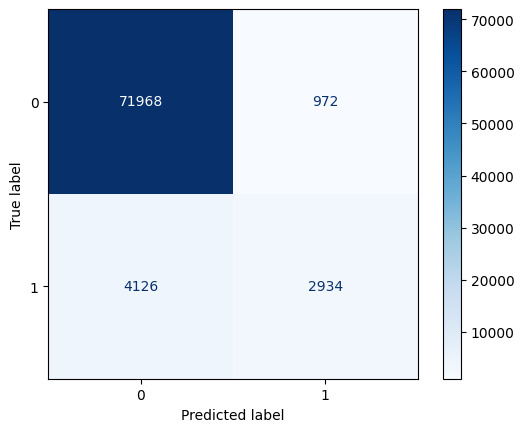

In [75]:
best_k, best_scaler, best_score = KNNRunTime.model_training(X_train,X_test,y_train,y_test)
knn = KNNRunTime.evaluate(X_train,X_test,y_train,y_test,best_scaler)
KNNRunTime.ConfusionMatrix(X_train,X_test,y_train,y_test,knn)

# svm

In [24]:
svm_grouped_df = copy.deepcopy(grouped_df)



---
**tags balancing**


In [25]:
pr = 64.89/733
length = 100000

In [26]:
# Filter and assign for manner_of_death == 2
filtered_df_2 = svm_grouped_df[svm_grouped_df['manner_of_death'] != 7].head(int(length * pr))

# Filter and assign for manner_of_death == 1
filtered_df_1 = svm_grouped_df[svm_grouped_df['manner_of_death'] == 7].head(length-int(length * pr))


# Concatenate the filtered DataFrames with the remaining data
svm_grouped_df = pd.concat([filtered_df_2, filtered_df_1])


# Reset the index if needed
svm_grouped_df = svm_grouped_df.reset_index(drop=True)

In [27]:
svm_grouped_df['manner_of_death'] = svm_grouped_df['manner_of_death'].replace({7: 0, 1: 1, 2: 1, 3: 1})

In [28]:
X = svm_grouped_df
y = svm_grouped_df
sc = StandardScaler()
y=y['manner_of_death'].to_numpy()
X=X.drop(['manner_of_death','detail_age_type'],axis=1).to_numpy()
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.2)
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

Accuracy for C = 10 is 0.9335
Accuracy for C = 20 is 0.9323625
Accuracy for C = 30 is 0.9298375
Accuracy for C = 40 is 0.9297375
Accuracy for C = 50 is 0.929775
Accuracy for C = 60 is 0.929775
Accuracy for C = 70 is 0.9298375
Accuracy for C = 80 is 0.9298375
Accuracy for C = 90 is 0.92985
Accuracy for C = 100 is 0.929925
Best C = 10
Max accuracy = 0.9335


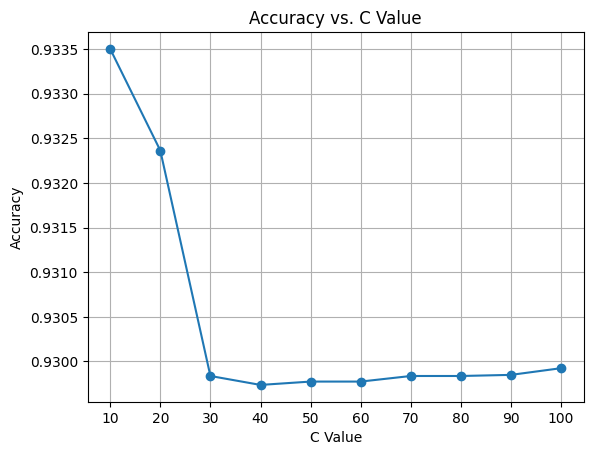

In [29]:

max_accur = 0.0
best_c = None
svm_accuracies = []

for c in range(10, 101, 10):
    svm = SVC(kernel='rbf', C=c)
    svm.fit(X_train, y_train)
    accur = svm.score(X_test, y_test)
    svm_accuracies.append(accur)
    if accur > max_accur:
        max_accur = accur
        best_c = c
    print("Accuracy for C =", c, "is", accur)

print("Best C =", best_c)
print("Max accuracy =", max_accur)
#יצירת גרף השוואה בין ערכי הסי לדיוק
c_values = np.arange(10, 101, 10)
plt.plot(c_values, svm_accuracies, marker='o')
plt.title('Accuracy vs. C Value')
plt.xlabel('C Value')
plt.ylabel('Accuracy')
plt.xticks(c_values)
plt.grid(True)
plt.show()

svm = SVC(C=best_c, kernel='rbf')



In [30]:

svm = SVC(C=best_c, kernel='rbf')
svm.fit(X_train,y_train)
print(sum(cross_val_score(svm,X,y,cv=5))/5)

0.9304399999999999


              precision    recall  f1-score   support

         0.0     0.9421    0.9883    0.9646     18218
         1.0     0.7596    0.3793    0.5060      1782

    accuracy                         0.9340     20000
   macro avg     0.8508    0.6838    0.7353     20000
weighted avg     0.9259    0.9340    0.9238     20000



### legend:
true:1
fasle:0

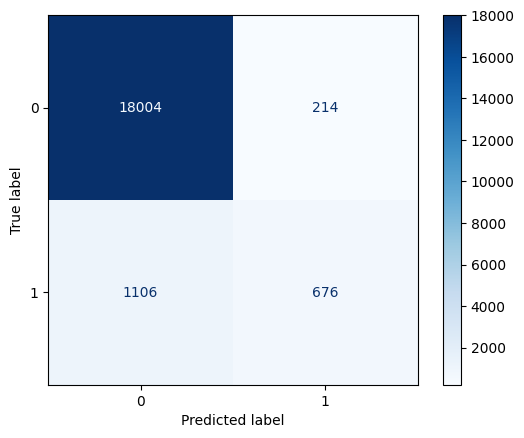

In [31]:
pred = svm.predict(X_train)
cm = confusion_matrix(y_train, pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm)
cmd.plot(values_format="d", cmap='Blues')
print(classification_report(y_train, pred, digits=4))
md(f'### legend:'+'\n'+ 'true:1'+'\n'+'fasle:0')


# at last

The best algorithm for this prediction is knn it is much faster and got a better f1 score on the violent death prediction


When I first chose this data frame I wanted to predict suicide vs natural death but i realized that is not possible because the normal suicide rate was much smaller compared to the natural death rate, so I had to get creative and combine all of the violent deaths into one category. although I got a nice final f1 score my f1 score for violent deaths was still not that good. Manner of death prediction is a complicated problem and I think that if I used better algorithms with neural network and deep learning I would come up with better results.
I have learned to use the py libraries pandas, seaborn, matplotlib, and more.
I enjoyed plotting the most it was fun and interesting i also tried making an NN algorithm using TensorFlow.
